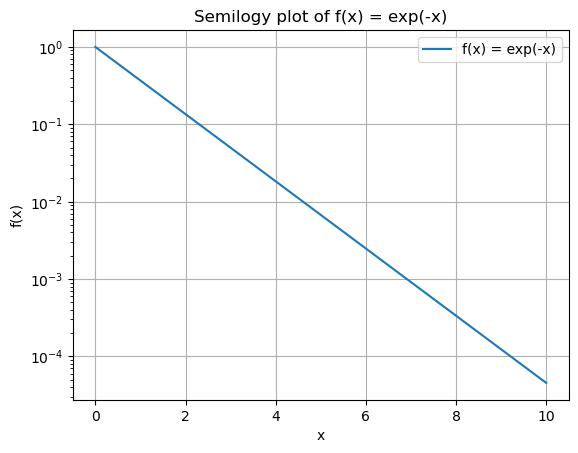

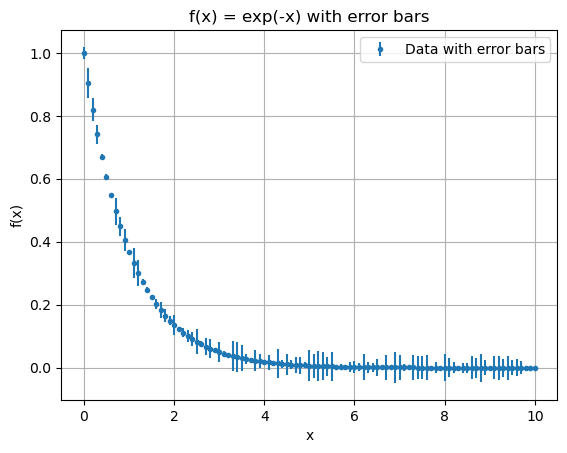

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# a) Create numpy array X in [-1, 1]
X1 = np.arange(-1.0, 1.1, 0.1)  # steps of 0.1

# b) Create Y = f(X) = X^2
Y1 = X1**2

# c) Plot the function f(x) = x^2
plt.figure()
plt.plot(X1, Y1, label="f(x) = x^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of f(x) = x^2")
plt.grid(True)
plt.legend()
plt.show()

# d) Repeat for f(x) = exp(-x), x ∈ [0, 10]
X2 = np.arange(0.0, 10.1, 0.1)
Y2 = np.exp(-X2)

# e) Plot f(x) = exp(-x) in log scale
plt.figure()
plt.semilogy(X2, Y2, label="f(x) = exp(-x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Semilogy plot of f(x) = exp(-x)")
plt.grid(True)
plt.legend()
plt.show()

# f) Add random errors to Y2
np.random.seed(42)  # for reproducibility
deltaY2 = 0.05 * np.random.rand(len(X2))  # small random std deviation

# g) Plot Y2 with error bars
plt.figure()
plt.errorbar(X2, Y2, yerr=deltaY2, fmt='o', markersize=3, label="Data with error bars")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("f(x) = exp(-x) with error bars")
plt.grid(True)
plt.legend()
plt.show()


In [6]:
import numpy as np

# Pauli Z and identity
sz = np.array([[1, 0], [0, -1]])
I = np.eye(2)

# Function to build total magnetization operator M for N spins
def total_magnetization_z(N):
    M = np.zeros((2**N, 2**N), dtype=complex)
    for i in range(N):
        ops = [I] * N
        ops[i] = sz  # Place σz at position i
        term = ops[0]
        for op in ops[1:]:
            term = np.kron(term, op)
        M += term
    return M

# Example: total magnetization for 3 spins
M3 = total_magnetization_z(3)

print("Total magnetization M for 3 spins has shape:", M3.shape)


Total magnetization M for 3 spins has shape: (8, 8)


In [27]:
M4 = total_magnetization_z(4)
print("Total magnetization M for 3 spins has shape:", M4.shape)
sp.Matrix(M4)

Total magnetization M for 3 spins has shape: (16, 16)


Matrix([
[4.0,   0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,    0,    0],
[  0, 2.0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,    0,    0],
[  0,   0, 2.0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,    0,    0],
[  0,   0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,    0,    0],
[  0,   0,   0, 0, 2.0, 0, 0,    0,   0, 0, 0,    0, 0,    0,    0,    0],
[  0,   0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,    0,    0],
[  0,   0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,    0,    0],
[  0,   0,   0, 0,   0, 0, 0, -2.0,   0, 0, 0,    0, 0,    0,    0,    0],
[  0,   0,   0, 0,   0, 0, 0,    0, 2.0, 0, 0,    0, 0,    0,    0,    0],
[  0,   0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,    0,    0],
[  0,   0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,    0,    0],
[  0,   0,   0, 0,   0, 0, 0,    0,   0, 0, 0, -2.0, 0,    0,    0,    0],
[  0,   0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,    0,    0],
[  0,   0,   0, 

In [6]:
import numpy as np

# Define Pauli matrices
sx = np.array([[0, 1], [1, 0]])
sy = np.array([[0, -1j], [1j, 0]])
sz = np.array([[1, 0], [0, -1]])
I = np.eye(2)

# Function to create operator acting on i-th and j-th qubit
def operator_on_sites(op1, op2, i, j, N):
    op_list = [I] * N
    op_list[i] = op1
    op_list[j] = op2
    result = op_list[0]
    for op in op_list[1:]:
        result = np.kron(result, op)
    return result

# Build Heisenberg Hamiltonian for N spins
def heisenberg_H(N):
    H = np.zeros((2**N,2**N), dtype=complex)
    for i in range(N - 1):
        H += operator_on_sites(sx, sx, i, i+1, N)
        H += operator_on_sites(sy, sy, i, i+1, N)
        H += operator_on_sites(sz, sz, i, i+1, N)
    return H


H3 = heisenberg_H(2)

print("Heisenberg Hamiltonian for 3 spins has shape:", H3.shape)


Heisenberg Hamiltonian for 3 spins has shape: (4, 4)


In [7]:
import sympy as sp
sp.Matrix(H3)


Matrix([
[1.0,    0,    0,   0],
[  0, -1.0,  2.0,   0],
[  0,  2.0, -1.0,   0],
[  0,    0,    0, 1.0]])

In [15]:
Hnm=np.array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         1.+1.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.-1.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  1.-1.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  1.+1.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.-1.j, -1.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+1.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  1.+1.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,
         0.+0.j],
       [ 1.-1.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        -1.+0.j]])

In [23]:
sp.Matrix(Hnm)

Matrix([
[        1.0,           0,           0,           0,           0,           0,           0, 1.0 + 1.0*I],
[          0,        -1.0,           0,           0,           0,           0, 1.0 - 1.0*I,           0],
[          0,           0,        -1.0,           0,           0, 1.0 - 1.0*I,           0,           0],
[          0,           0,           0,         1.0, 1.0 + 1.0*I,           0,           0,           0],
[          0,           0,           0, 1.0 - 1.0*I,        -1.0,           0,           0,           0],
[          0,           0, 1.0 + 1.0*I,           0,           0,         1.0,           0,           0],
[          0, 1.0 + 1.0*I,           0,           0,           0,           0,         1.0,           0],
[1.0 - 1.0*I,           0,           0,           0,           0,           0,           0,        -1.0]])

In [69]:
import numpy as np

# Example setup
n = 2
I = np.eye(2)  # Identity matrix
sigz = np.mat([[1, 0], [0, -1]])  # Pauli Z matrix

# Initialize M (total magnetization operator) to zero matrix
#M = np.zeros_like(I)

# Loop for constructing the magnetization operator
for i in range(1,n):  # Adjusted loop range
    op1, opiz, opi, opi_1 = I, sigz, None, None  # Initialize variables
    
    # Compute tensor products
    op1 = n_tensor_prod(I, i)
    opiz = sigz
    opi = np.kron(op1, opiz)
    print(sp.Matrix(opi))
    opi_1 = n_tensor_prod(I, (n-i))
    opf = np.kron(opi, opi_1)
    print(sp.Matrix(opf))
    M += opf
print(M)


Matrix([[1.00000000000000, 0.0, 0.0, 0.0], [0.0, -1.00000000000000, 0.0, 0.0], [0.0, 0.0, 1.00000000000000, 0.0], [0.0, 0.0, 0.0, -1.00000000000000]])
Matrix([[1.00000000000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.00000000000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.00000000000000, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, -1.00000000000000, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.00000000000000, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.00000000000000, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.00000000000000, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.00000000000000]])


ValueError: operands could not be broadcast together with shapes (2,2) (8,8) (2,2) 

In [47]:
def n_tensor_prod(mat,n):
    if n!=0:
        mtn=reduce(np.kron,[mat]*n)

    else: mtn= None
    return mtn

from functools import reduce

In [50]:
n_tensor_prod(I,0)

In [6]:
import numpy as np
import scipy
from scipy import sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt

Id = sparse.csr_matrix(np.eye(2))
Sx = sparse.csr_matrix([[0., 1.], [1., 0.]])
Sz = sparse.csr_matrix([[1., 0.], [0.,-1.]])
sy = sparse.csr_matrix([[0.,-1.j],[1.j,0.]])
Splus = sparse.csr_matrix([[0., 1.], [0., 0.]])
Sminus = sparse.csr_matrix([[0., 0.], [1., 0.]])

def singesite_to_full(op, i, L):
    op_list = [Id]*L # = [Id, Id, Id ...] with L entries
    op_list[i] = op
    full = op_list[0]
   # final_op = []
    for op_i in op_list[1:]:
        full = sparse.kron(full, op_i, format="csr")
     #   final_op.append(full)
    return full

def gen_sy_list(L):
    return [singesite_to_full(sy,i,L) for i in range(L)]
    
def gen_sx_list(L):
    return [singesite_to_full(Sx, i, L) for i in range(L)]

def gen_sz_list(L):
    return [singesite_to_full(Sz, i, L) for i in range(L)]

def gen_hamiltonian_periodic(sx_list, sz_list,sy_list, g, J=1.):
    """ assumes periodic boundery conditions """
    L = len(sx_list)
    H = sparse.csr_matrix((2**L, 2**L))
    for j in range(L):
        H -= J *( sx_list[j] * sx_list[(j+1)%L]+ sy_list[j] * sz_list[(j+1)%L]+ sz_list[j] * sz_list[(j+1)%L])
        H -= g * sz_list[J]
    return H

In [22]:
def Hsig_to_full(op, i, L):
    op_list = [Id]*L # = [Id, Id, Id ...] with L entries
    op_list[i] = op
    op_list[(i+1)%L] =op
    full = op_list[0]
   # final_op = []
    for op_i in op_list[1:]:
        full = sparse.kron(full, op_i, format="csr")
     #   final_op.append(full)
    return full
    
    

In [23]:
def gen_ham(L):
    H= sparse.csr_matrix((2**L,2**L))
    for j in range(L):
        H+=-t*(Hsig_to_full(Sx,j,L)+Hsig_to_full(sy,j,L)+Hsig_to_full(Sz,j,L))

    return H
  

In [42]:
t=1
L=2
testham = gen_ham(L) * (1/L)

In [43]:
sp.Matrix(testham.toarray())

Matrix([
[-1.0,    0,    0,    0],
[   0,  1.0, -2.0,    0],
[   0, -2.0,  1.0,    0],
[   0,    0,    0, -1.0]])

In [12]:
L = 2
g = 0
sx_list = gen_sx_list(L)
sz_list = gen_sz_list(L)
sy_list = gen_sy_list(L)
Ham = gen_hamiltonian_periodic(sx_list,sz_list,sy_list,g,J=1)
Ham

<4x4 sparse matrix of type '<class 'numpy.complex128'>'
	with 16 stored elements in Compressed Sparse Row format>

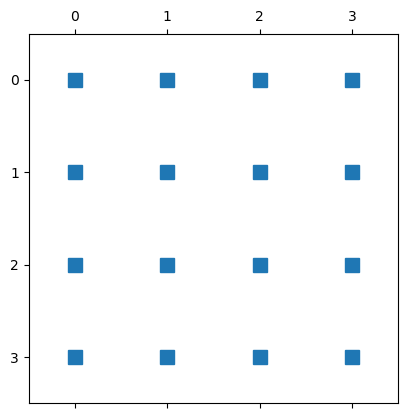

In [83]:
plt.spy(Ham)


In [84]:
import sympy as sp

In [85]:
sp.Matrix(Ham.toarray())

Matrix([
[  -2.0, 1.0*I, 1.0*I,   -2.0],
[-1.0*I,   2.0,  -2.0, -1.0*I],
[-1.0*I,  -2.0,   2.0, -1.0*I],
[  -2.0, 1.0*I, 1.0*I,   -2.0]])

In [72]:
sp.Matrix(Ham.toarray())


Matrix([
[  -2.0, 1.0*I, 1.0*I,   -2.0],
[-1.0*I,   2.0,  -2.0, -1.0*I],
[-1.0*I,  -2.0,   2.0, -1.0*I],
[  -2.0, 1.0*I, 1.0*I,   -2.0]])

In [101]:
L=2
b0 = np.mat([1,0])
b1 = np.mat([0,1])
b0_list = [b0]*L
b1_list = [b1]*L
psi0n=b0
psi1n=b1
for bo in b0_list[1:]:
    psi0n = np.kron(psi0n,bo) 
for bi in b1_list[1:]:
    psi1n = np.kron(psi1n,bi)
psifull = psi0n+psi1n
psifull_normalized = psifull / np.linalg.norm(psifull)

In [102]:

psifull_normalized

matrix([[0.70710678, 0.        , 0.        , 0.70710678]])

In [127]:
magnet = sum(gen_sz_list(L))
sp.Matrix(magnet.toarray())

Matrix([
[2.0, 0.0, 0.0,  0.0],
[0.0, 0.0, 0.0,  0.0],
[0.0, 0.0, 0.0,  0.0],
[0.0, 0.0, 0.0, -2.0]])

In [157]:
rho0n = (psifull_normalized * psifull_normalized.H).toarray()
MexpN = np.trace(magnet*rho0n)
M2n = (magnet.H* magnet ).toarray()
M2expN = np.trace(M2n*rho0n)
print('expectation value of M', MexpN,'expectation value of M^2', M2expN )


expectation value of M 0.0 expectation value of M^2 3.999999999999999


In [123]:
M2expN

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Column format>

In [99]:
(magnet*rho0n).trace()

0.0

In [100]:
magnet.shape

(2, 2)

expectation value of M 0.0 expectation value of M^2   (0, 0)	0.9999999999999998
  (1, 1)	0.9999999999999998


In [137]:

b0 = sparse.csr_matrix([1, 0]).T  
b1 = sparse.csr_matrix([0, 1]).T 
b0_list = [b0] * L
b1_list = [b1] * L
psi0n = b0
psi1n = b1

for bo in b0_list[1:]:
    psi0n = sparse.kron(psi0n, bo, format='csr')
for bi in b1_list[1:]:
    psi1n = sparse.kron(psi1n, bi, format='csr')
psifull = psi0n + psi1n

psifull_normalized = psifull / np.linalg.norm((psifull).toarray())

sp.Matrix(psifull_normalized.toarray())

Matrix([
[0.707106781186547],
[              0.0],
[              0.0],
[0.707106781186547]])